In [1]:
import pandas as pd
import numpy as np
!pip install ydata_profiling
from ydata_profiling import ProfileReport

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rmse_list=[]
models_report_list=[]


In [3]:
train_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS_ML Coding Challenge Dataset  Training Dataset.csv')

In [4]:
train_data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


In [5]:
report = ProfileReport(train_data,explorative=True)

In [6]:
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
report.to_file("/content/drive/MyDrive/Colab Notebooks/train_data_report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:

# Find duplicates of this row
# Get the row at index 1829 as a DataFrame
row_df = train_data.loc[[1829]]
duplicates = train_data[train_data.duplicated(subset=row_df.columns, keep=False)==False]

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
83,NTM2,X1,A32,RETAIL,Small,Powder,Mar-21,127.68
363,NTM2,X1,A37,DIRECT,Large,Powder,Aug-20,180.00
1818,NTM2,X1,A37,DIRECT,Large,Powder,Nov-20,0.00
2560,NTM1,X1,A29,DIRECT,Small,Powder,Mar-21,169.56
3125,NTM1,X2,A44,DIRECT,Large,Liquid,Oct-20,129.82
...,...,...,...,...,...,...,...,...
544244,NTM2,X1,A23,RETAIL,Large,Powder,Sep-20,14110.72
545699,NTM2,X1,A10,DIRECT,Small,Powder,Sep-20,133.85
547625,NTM2,X1,A16,DIRECT,Small,Powder,May-21,12630.47
548160,NTM3,X1,A35,DIRECT,ExtraLarge,Powder,Nov-20,741.00


In [ ]:
row_df.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

In [ ]:
# Given row index to find duplicates
given_row_index = 1829

# Get the given row as a Series
given_row =train_data.loc[given_row_index]

# Compare all rows to the given row
duplicates = train_data[train_data.apply(lambda row: row.equals(given_row), axis=1)]

In [ ]:
duplicates

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
1829,NTM3,X1,A18,WHOLESALE,Small,Powder,Jan-21,106.72
2691,NTM3,X1,A18,WHOLESALE,Small,Powder,Jan-21,106.72
3119,NTM3,X1,A18,WHOLESALE,Small,Powder,Jan-21,106.72
8401,NTM3,X1,A18,WHOLESALE,Small,Powder,Jan-21,106.72
9882,NTM3,X1,A18,WHOLESALE,Small,Powder,Jan-21,106.72
...,...,...,...,...,...,...,...,...
132605,NTM3,X1,A18,WHOLESALE,Small,Powder,Jan-21,106.72
132799,NTM3,X1,A18,WHOLESALE,Small,Powder,Jan-21,106.72
135872,NTM3,X1,A18,WHOLESALE,Small,Powder,Jan-21,106.72
136231,NTM3,X1,A18,WHOLESALE,Small,Powder,Jan-21,106.72


In [6]:
test_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS_ML Coding Challenge Dataset Test Dataset.csv')

In [7]:
test_data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,Jun-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,Jun-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,Jun-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,Jun-21,32.32


In [ ]:
# Given row index to find duplicates
given_row_index2 = 0

# Get the given row as a Series
given_row2 =test_data.loc[given_row_index2]

# Compare all rows to the given row
duplicates2 = test_data[test_data.apply(lambda row: row.equals(given_row2), axis=1)]

In [ ]:
duplicates2

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68


In [8]:
data_list=[train_data,test_data]
data=pd.concat(data_list,axis=0)

In [9]:
data['Area Code']=data['Area Code'].str.replace('A','')

In [30]:
data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
91,NTM3,X1,44,DIRECT,Small,Liquid,Jun-21,89.57
92,NTM3,X1,8,DIRECT,Large,Powder,Jun-21,114.57
93,NTM3,X1,8,DIRECT,Small,Powder,Jun-21,111.26
94,NTM3,X2,20,DIRECT,Large,Powder,Jun-21,32.32


In [10]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/complete_data.csv',index=False)

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/complete_data.csv')

In [4]:
data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550267,NTM3,X1,44,DIRECT,Small,Liquid,Jun-21,89.57
550268,NTM3,X1,8,DIRECT,Large,Powder,Jun-21,114.57
550269,NTM3,X1,8,DIRECT,Small,Powder,Jun-21,111.26
550270,NTM3,X2,20,DIRECT,Large,Powder,Jun-21,32.32


In [11]:
r2_list=[]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550272 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550272 non-null  object 
 1   Manufacturer       550272 non-null  object 
 2   Area Code          550272 non-null  object 
 3   Sourcing Channel   550272 non-null  object 
 4   Product Size       550272 non-null  object 
 5   Product Type       550272 non-null  object 
 6   Month of Sourcing  550272 non-null  object 
 7   Sourcing Cost      550272 non-null  float64
dtypes: float64(1), object(7)
memory usage: 37.8+ MB


In [19]:
data.describe()

,Sourcing Cost
count,550272.000000
mean,108.816831
std,104.383259
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


In [ ]:
data.area

In [13]:
data2=data
data2=pd.get_dummies(data2, columns=['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing'])

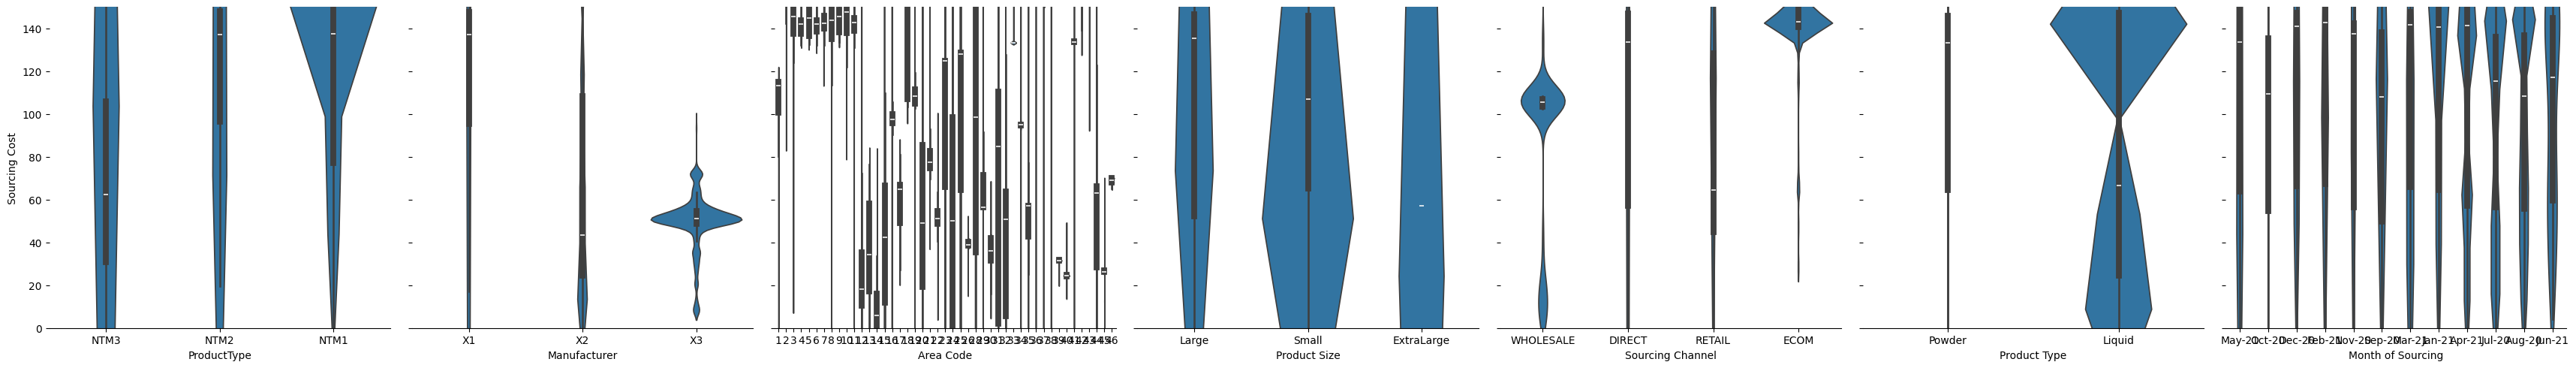

TypeError: 'NoneType' object is not subscriptable

In [24]:
# Explore the dataset


data.describe()

# Visualize the data (example plots)
g = sns.PairGrid(data, y_vars="Sourcing Cost",
                 x_vars=["ProductType", "Manufacturer", "Area Code", "Product Size","Sourcing Channel","Product Type",'Month of Sourcing'],
                 height=5, aspect=1)
g.map(sns.violinplot)
g.set(ylim=(0, 150))
sns.despine(fig=g.fig, left=True)
plt.show()[[0,3]]


# Step 2: Data Preprocessing
# Handle missing values if any
# df.dropna(inplace=True)  # Example

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing'])

# Split the data into training (June 2020 to May 2021) and test (June 2021) sets
train_data = data_encoded[data_encoded['Month of Sourcing_Jun-21'] == 0]
test_data = data_encoded[data_encoded['Month of Sourcing_Jun-21'] == 1]

X_train = train_data.drop(['Sourcing Cost', 'Month of Sourcing_Jun-21'], axis=1)
y_train = train_data['Sourcing Cost']
X_test = test_data.drop(['Sourcing Cost', 'Month of Sourcing_Jun-21'], axis=1)
y_test = test_data['Sourcing Cost']

In [26]:
plt.show(0,3)
plt.show()

  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1        28        WHOLESALE        Large   
1        NTM2           X1         9           DIRECT        Large   
2        NTM3           X2        20           DIRECT        Large   
3        NTM3           X1        18        WHOLESALE        Small   
4        NTM2           X1        28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder            May-21          10.16  
1       Powder            Oct-20         134.28  
2       Powder            Dec-20          12.46  
3       Powder            Feb-21         107.22  
4       Liquid            Nov-20         197.76  
<class 'pandas.core.frame.DataFrame'>
Index: 550272 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550272 non-null  object 
 1   Manufacturer       550272 

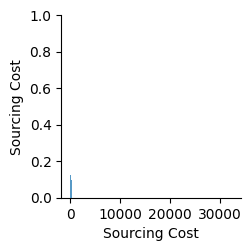

Linear Regression - RMSE: 48.17877411816545, R-squared: 0.144404669081735
Random Forest - RMSE: 37.00873824231257, R-squared: 0.4951463825058644
   Actual  Linear Regression Predicted  Random Forest Predicted
0  103.68                   137.509969               108.905639
1  155.75                   142.360584               153.258781
2  143.02                   148.689892               149.754338
3  139.39                   142.449551               145.337218
4  169.42                   141.648851               166.695791
5  169.15                   143.928244               173.482156
6   47.99                   139.912069                49.009113
7   56.52                   140.001036                56.519961
8  125.51                   135.358839               149.765546
9  157.27                   141.737817               149.810349


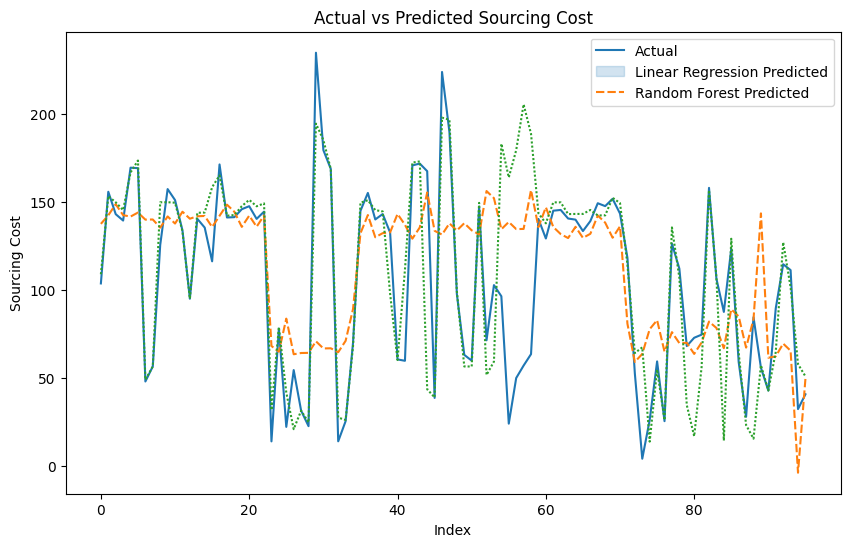

In [31]:


# Step 1: Data Understanding and EDA
# Load the dataset into a DataFrame
# df = pd.read_csv('path_to_your_dataset.csv')



# Step 3: Feature Engineering (if needed)
# Add time-series features or lagged variables if applicable

# Step 4: Model Selection and Training
# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor()

# Train models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Step 5: Model Comparison and Selection
# Evaluate models on the validation set (part of the training data)
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
linear_r2 = r2_score(y_test, y_pred_linear)
rmse_list.append(linear_rmse)
r2_list.append(linear_r2)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)
rmse_list.append(rf_rmse)
r2_list.append(rf_r2)

print(f"Linear Regression - RMSE: {linear_rmse}, R-squared: {linear_r2}")
print(f"Random Forest - RMSE: {rf_rmse}, R-squared: {rf_r2}")

# Step 6: Fine-Tuning and Validation (optional)
# Tune hyperparameters and validate the models if needed

# Step 7: Result Analysis and Interpretation
# Compare actual vs predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Linear Regression Predicted': y_pred_linear, 'Random Forest Predicted': y_pred_rf})
print(result_df.head(10))

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
sns.lineplot(data=result_df[['Actual', 'Linear Regression Predicted', 'Random Forest Predicted']])
plt.xlabel('Index')
plt.ylabel('Sourcing Cost')
plt.title('Actual vs Predicted Sourcing Cost')
plt.legend(['Actual', 'Linear Regression Predicted', 'Random Forest Predicted'])
plt.show()


In [12]:
X_train

,Area Code,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,...,Month of Sourcing_Aug-20,Month of Sourcing_Dec-20,Month of Sourcing_Feb-21,Month of Sourcing_Jan-21,Month of Sourcing_Jul-20,Month of Sourcing_Mar-21,Month of Sourcing_May-21,Month of Sourcing_Nov-20,Month of Sourcing_Oct-20,Month of Sourcing_Sep-20
0,A28,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,A9,False,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,A20,False,False,True,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
3,A18,False,False,True,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,A28,False,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550171,A5,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
550172,A14,False,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
550173,A5,False,True,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
550174,A7,False,True,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


0     NTM3
1     NTM2
2     NTM3
3     NTM3
4     NTM2
      ... 
91    NTM3
92    NTM3
93    NTM3
94    NTM3
95    NTM3
Name: ProductType, Length: 550272, dtype: object

In [2]:
!pip install xgboost

Random Forest RMSE: 36.61253659002782
Linear Regression RMSE: 48.17877411816545
XGBoost RMSE: 36.57152298820478


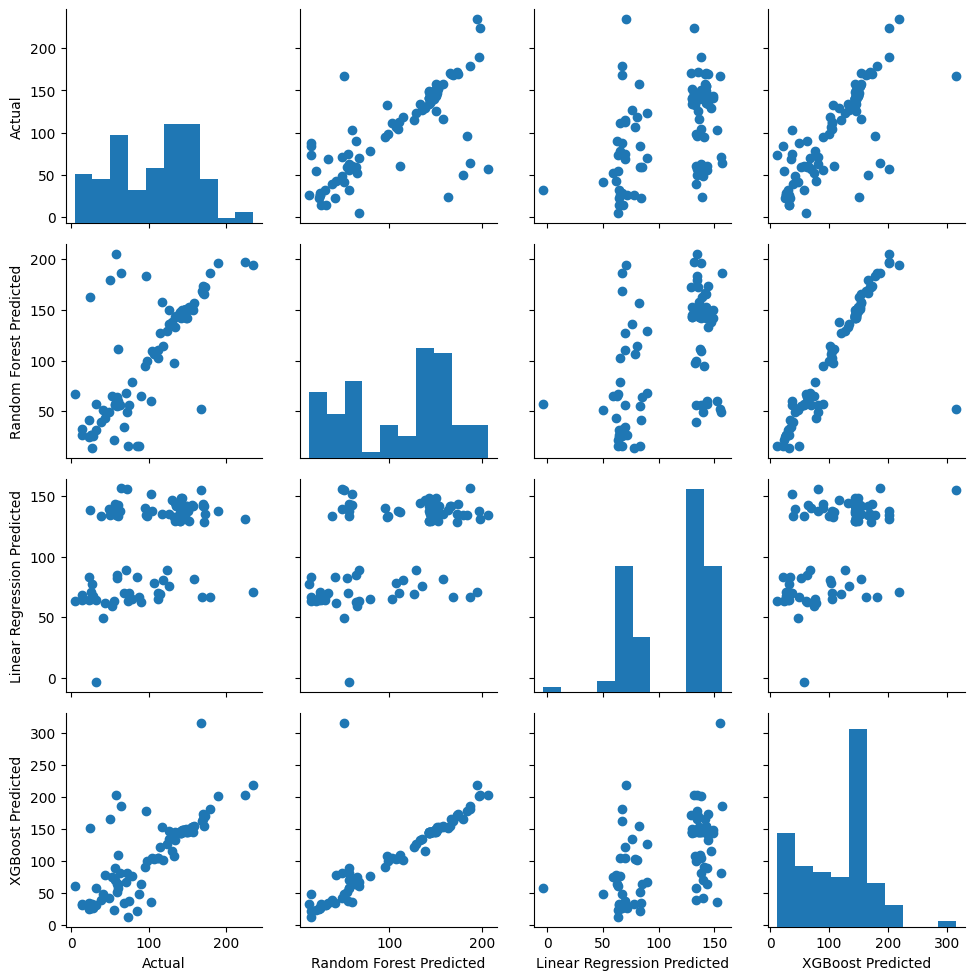

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and preprocessed your data into X_train, y_train, X_test, y_test
# Replace X_train, y_train, X_test, y_test with your actual training and test data

# Initialize models
random_forest_model = RandomForestRegressor(random_state=42)
linear_regression_model = LinearRegression()
# svm_regressor = SVR()
xgb_regressor = XGBRegressor(random_state=42)

# Train models
random_forest_model.fit(X_train, y_train)
linear_regression_model.fit(X_train, y_train)
# svm_regressor.fit(X_train, y_train)
xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)
y_pred_lr = linear_regression_model.predict(X_test)
# y_pred_svm = svm_regressor.predict(X_test)
y_pred_xgb = xgb_regressor.predict(X_test)

# Calculate RMSE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
# rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Linear Regression RMSE: {rmse_lr}")
# print(f"SVM Regression RMSE: {rmse_svm}")
print(f"XGBoost RMSE: {rmse_xgb}")

# Create a DataFrame to compare actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Random Forest Predicted': y_pred_rf,
                           'Linear Regression Predicted': y_pred_lr,
                           'XGBoost Predicted': y_pred_xgb})

# Plot actual vs predicted values using PairGrid
g = sns.PairGrid(results_df, vars=['Actual', 'Random Forest Predicted', 'Linear Regression Predicted',
                                    'XGBoost Predicted'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

plt.show()


In [39]:
results_df.reset_index(inplace=True,index=False)

In [46]:
results_df.drop('index',axis=1,inplace=True)

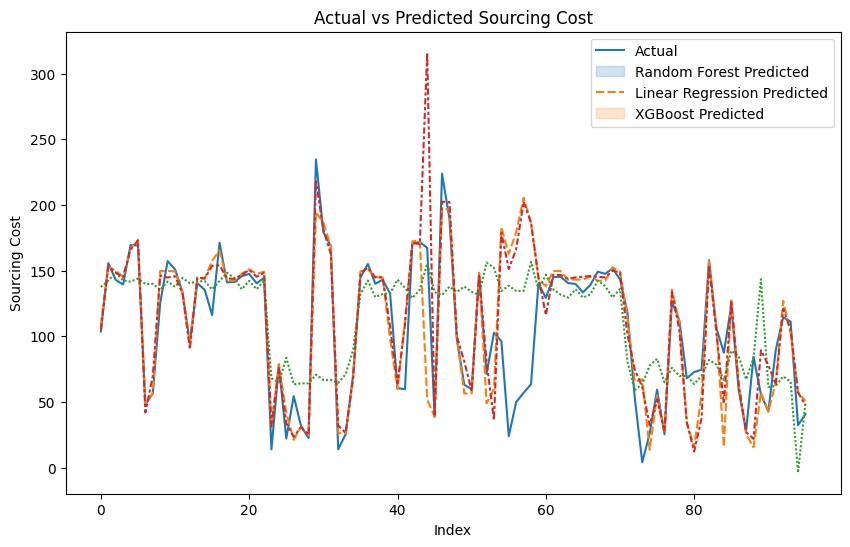

In [57]:
import numpy as np
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df[['Actual','Random Forest Predicted','Linear Regression Predicted','XGBoost Predicted']])
plt.xlabel('Index')
plt.ylabel('Sourcing Cost')
plt.title('Actual vs Predicted Sourcing Cost')
plt.legend(['Actual','Random Forest Predicted','Linear Regression Predicted','XGBoost Predicted'])
plt.show()